In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Append the correct src path for custom module imports
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../data'))

In [2]:
from data_processing import load_data, clean_data
from sale_analysis import (
    plot_sales_distribution,
    compare_sales_holidays,
    seasonal_behavior,
    correlation_analysis,
    promo_effect,
    effective_promo_deployment,
    customer_behavior_trends,
    weekday_openings,
    assortment_type_impact,
    competitor_distance_impact,
    new_competitor_effects
)

In [3]:

# Load datasets
train_data = load_data('../data/train.csv')
test_data = load_data('../data/test.csv')
store_data = load_data('../data/store.csv')

c:\Users\getac\Documents\10 Academy\week 4\KAIMW4\src\data_processing.py:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
2024-09-20 16:52:28,874 - INFO - Data loaded successfully from ../data/train.csv
2024-09-20 16:52:28,907 - INFO - Data loaded successfully from ../data/test.csv
2024-09-20 16:52:28,912 - INFO - Data loaded successfully from ../data/store.csv


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [7]:
train_data.size

9154881

In [8]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [11]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [12]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
# Clean datasets
train_data = clean_data(train_data)
test_data = clean_data(test_data)

# Merge datasets
merged_data = pd.merge(train_data, store_data, on='Store')
merged_data.head()

2024-09-20 16:52:29,675 - INFO - Data cleaned successfully
2024-09-20 16:52:29,691 - INFO - Data cleaned successfully


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
merged_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

2024-09-20 16:52:39,092 - WARNING - The 'Sales' column is missing from the test data. Only training data will be plotted.
2024-09-20 16:52:39,246 - INFO - Sales distribution comparison plot saved as sales_distribution_comparison.png


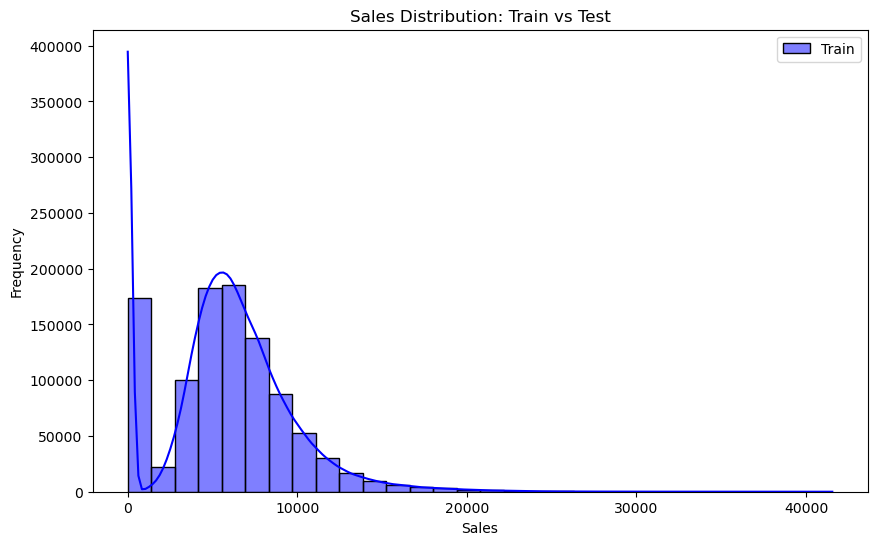

In [17]:
# Distribution Analysis
plot_sales_distribution(train_data, test_data)

2024-09-20 16:52:39,725 - INFO - Holiday sales comparison plot saved as holiday_sales_comparison.png


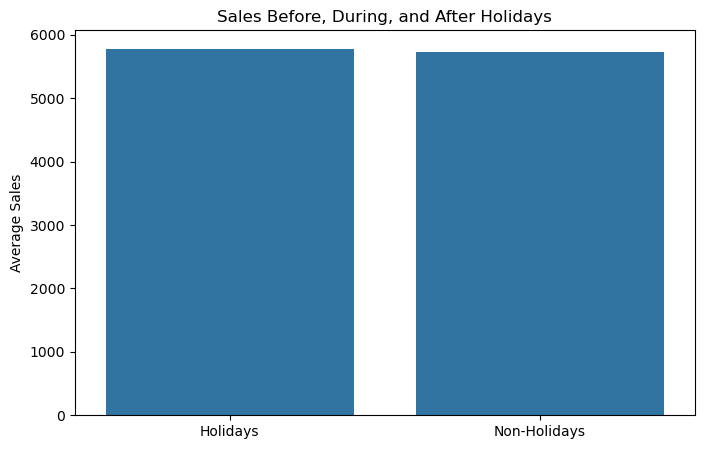

In [18]:
# 2. Sales Behavior During Holidays
compare_sales_holidays(merged_data)

2024-09-20 16:52:40,092 - INFO - c:\Users\getac\Documents\10 Academy\week 4\KAIMW4\src\../notebook/plots\Seasonal sales plot saved as seasonal_sales.png


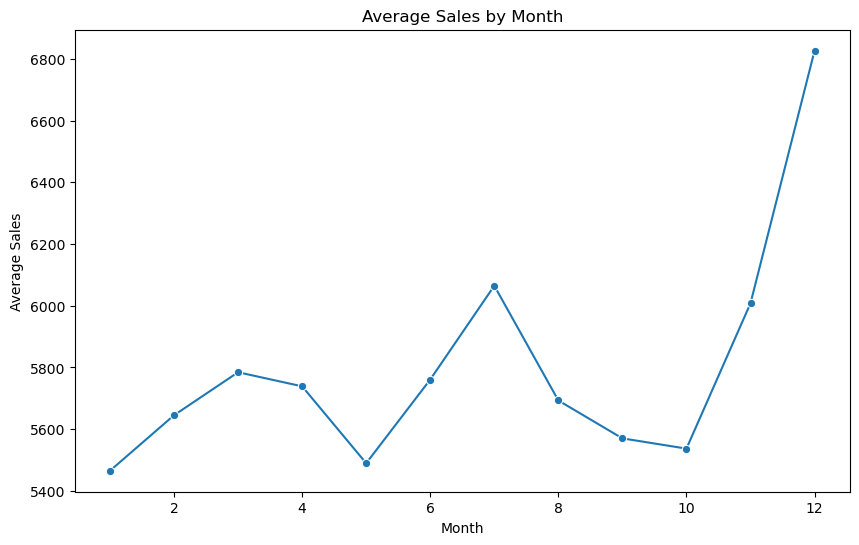

In [19]:
# Seasonal Purchase Behavior
seasonal_behavior(merged_data)

2024-09-20 16:52:40,248 - INFO - Correlation between Sales and Customers: 0.894710773301837
2024-09-20 16:52:45,725 - INFO - Sales vs Customers correlation plot saved as sales_customers_correlation.png


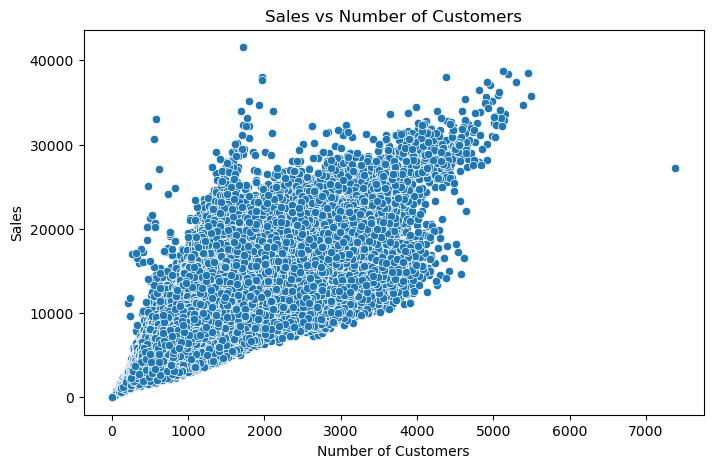

In [20]:
# Correlation Analysis
correlation_analysis(merged_data)

2024-09-20 16:52:48,361 - INFO - Promo effect plot saved as promo_effect.png


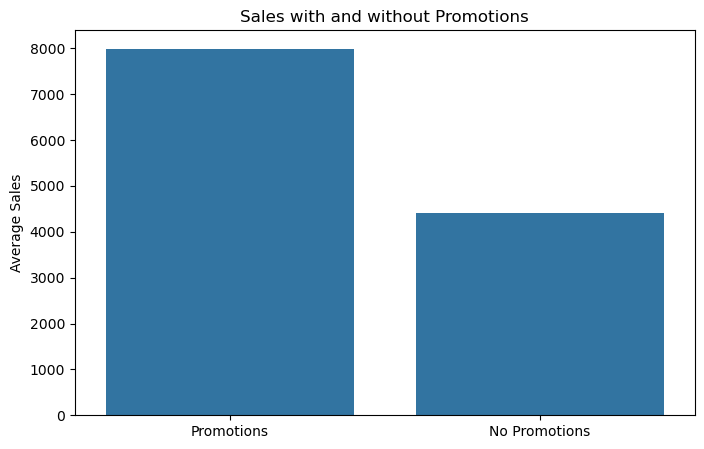

In [21]:
# Promo Effects
promo_effect(merged_data)

2024-09-20 16:52:48,511 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 16:52:48,525 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 16:52:53,736 - INFO - Store promo effect plot saved as store_promo_effect.png


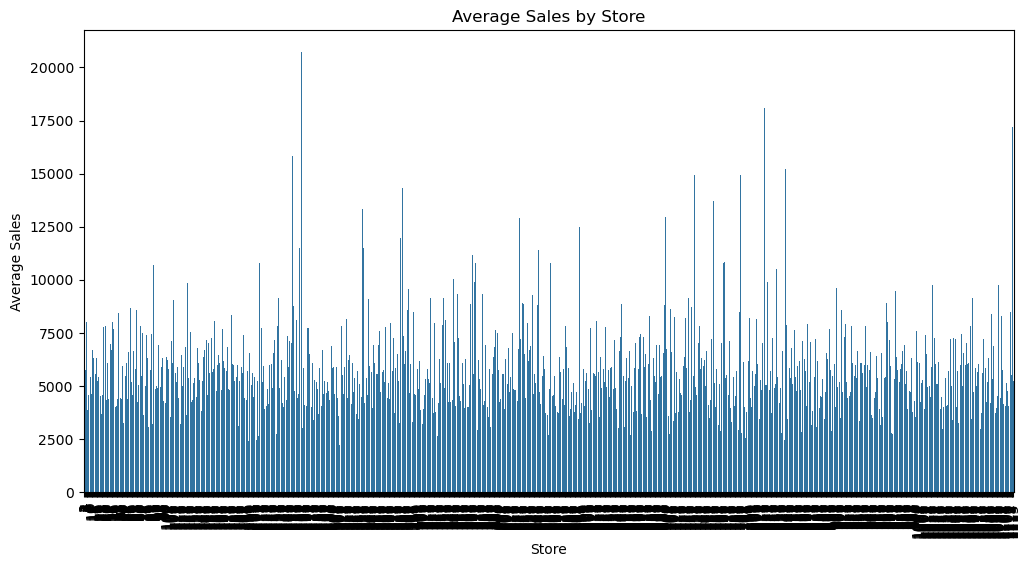

In [22]:


# Effective Promo Deployment
effective_promo_deployment(merged_data)

2024-09-20 16:53:26,143 - INFO - Customer behavior trends plot saved as customer_behavior_trends.png


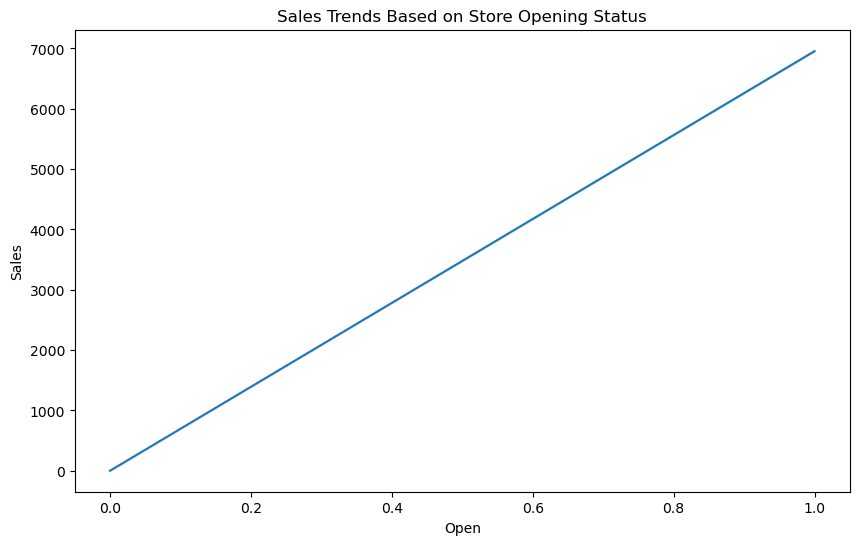

In [23]:
# Customer Behavior Trends
customer_behavior_trends(merged_data)

In [24]:
# Weekday Store Openings
weekday_openings(merged_data)

2024-09-20 16:53:26,407 - INFO - Stores open on all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 

2024-09-20 16:53:26,590 - INFO - Assortment impact plot saved as assortment_impact.png


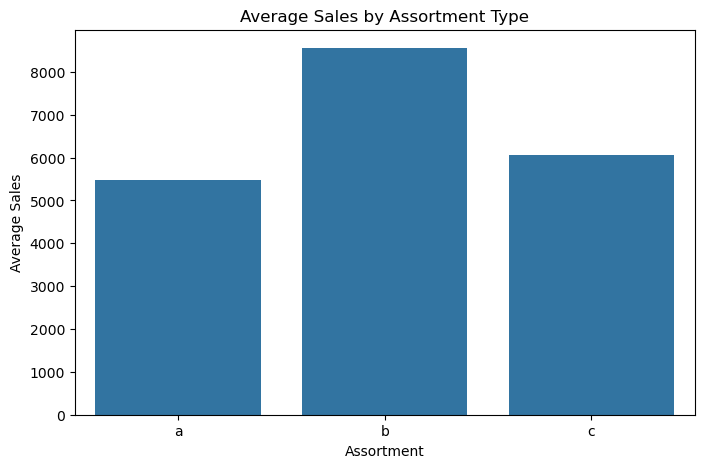

In [25]:
# Assortment Type Impact
assortment_type_impact(merged_data)

2024-09-20 16:53:32,043 - INFO - Competitor distance impact plot saved as competitor_distance_impact.png


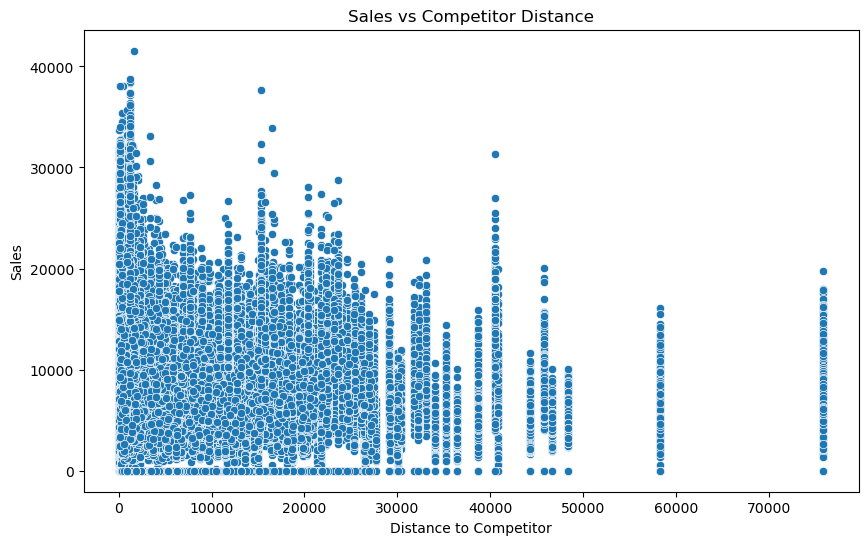

In [26]:
# Competitor Distance Impact
competitor_distance_impact(merged_data)

c:\Users\getac\Documents\10 Academy\week 4\KAIMW4\src\sale_analysis.py:147: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_competitors['CompetitionDistance'] = new_competitors['CompetitionDistance'].fillna(method='ffill')
2024-09-20 16:53:53,178 - INFO - New competitor effects plot saved as new_competitor_effects.png


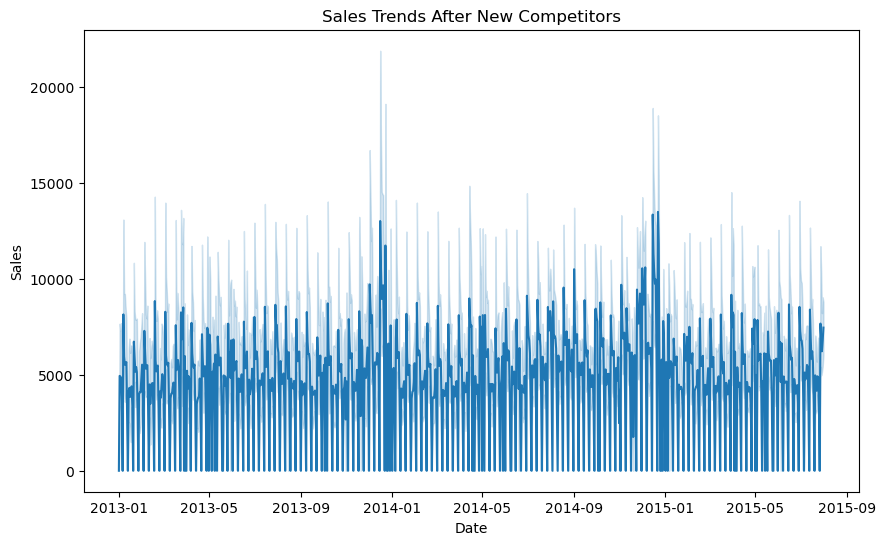

In [27]:
# New Competitor Effects
new_competitor_effects(merged_data)